<a href="https://colab.research.google.com/github/Abhi311509/ABC-Tech/blob/main/ABC_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pymysql
#!pip install mysql-connector

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import os
#import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## The original dataset was in MySql Server,by using sql queries we have extracted data from **project_itsm** database,we have extracted dataset_list(dataframe) and converted the dataset to **CSV** file format.

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Internships/ABC.csv')

<ipython-input-2-93b5716d3529>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/content/drive/MyDrive/Internships/ABC.csv')


In [3]:
data.columns

Index(['Unnamed: 0', 'CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID',
       'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'KB_number', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

# **Domain Analysis**

1. **Configuration Item Name** : A Configuration Item (CI) is a component or asset within an IT system that needs to be managed, tracked, and controlled. Examples of CIs might include hardware devices, software applications, network components, or even people and processes.

2. **CI_Cat** : In ITSM refers to the category or classification of a specific Configuration Item. The category might be used to group similar CIs together for easier management and tracking, or to help identify the type of CI and its function within the IT environment.

3. **CI_Subcat** : This column refers to the CI subcategory, which is a further classification of the CI within its category. Examples of CI subcategories include server, desktop, laptop, operating system, and application.

4. **WBS** : This column refers to the Work Breakdown Structure (WBS), which is a hierarchical decomposition of the project into smaller, more manageable components. The WBS is used to organize and track the work required to complete the project.

5. **Incident_ID** : This column refers to the unique identification number assigned to the incident. This number is used to track and manage the incident throughout its lifecycle.

6. **Status** : This column refers to the current status of the incident. Examples of status include new, in progress, resolved, and closed.

7. **Impact** : This column refers to the degree of impact the incident has on the business. The impact is usually measured in terms of the number of users affected and the level of disruption to business operations.

8. **Urgency** : This column refers to the degree of urgency required to resolve the incident. Urgency is usually measured in terms of the business impact and the severity of the issue.

9. **Priority** : This column refers to the priority level assigned to the incident. The priority is usually determined based on the impact and urgency of the incident, as well as other factors such as customer requirements and contractual obligations.

10. **number_cnt** : This column refers to the number of times the incident has been logged or recorded.

11. **Category** : This column refers to the category of the incident, which is a way to classify the type of issue being reported. This can include categories such as hardware, software, network, user, and more.

12. **KB_number** : This column refers to the knowledge base (KB) article number associated with the incident. A knowledge base is a centralized repository of information that contains solutions to common issues and troubleshooting guides.

13. **Alert_Status** : This column refers to the status of any alerts associated with the incident. Alerts are notifications generated by a monitoring system that detect and report on events or issues.

14. **No_of_Reassignments** : This column refers to the number of times the incident has been reassigned to a different team or individual for further investigation or resolution.

15. **Open_Time** : This column refers to the date and time when the incident was initially opened or reported.

16. **Reopen_Time** : This column refers to the date and time when the incident was reopened after being closed previously.

17. **Resolved_Time** : This column refers to the date and time when the incident was resolved, meaning the issue has been identified and a solution has been implemented.

18. **Close_Time** : This column refers to the date and time when the incident was closed, meaning the issue has been fully resolved and no further action is required.

19. **Handle_Time_hrs** : This column refers to the total time in hours that was spent working on the incident. This includes the time spent investigating, troubleshooting, and resolving the issue.

20. **Closure_Code** : This column refers to the code or reason used to close the incident. This can include codes such as "resolved," "closed by user," "no fault found," and more.

21. **No_of_Related_Interactions** : This column refers to the number of related interactions associated with the incident. Related interactions can include things like phone calls, emails, or chat messages related to the incident.

22. **Related_Interaction** : This column refers to the specific interaction or communication associated with the incident.

23. **No_of_Related_Incidents** : This column refers to the number of related incidents associated with the incident being reported.

24. **No_of_Related_Changes** : This column refers to the number of related changes associated with the incident being reported. Changes can include things like updates to software, hardware upgrades, or modifications to IT infrastructure.

25. **Related_Change** : This column refers to the specific change or modification associated with the incident being reported.

# **Basic Checks**

In [4]:
pd.set_option('display.max_columns',26)

In [5]:
data

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Unnamed: 0                        0
CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  46606 non-null  int64  
 1   CI_Name                     46606 non-null  object 
 2   CI_Cat                      46495 non-null  object 
 3   CI_Subcat                   46495 non-null  object 
 4   WBS                         46606 non-null  object 
 5   Incident_ID                 46606 non-null  object 
 6   Status                      46606 non-null  object 
 7   Impact                      46606 non-null  object 
 8   Urgency                     46606 non-null  object 
 9   Priority                    45226 non-null  float64
 10  number_cnt                  46606 non-null  float64
 11  Category                    46606 non-null  object 
 12  KB_number                   46606 non-null  object 
 13  Alert_Status                466

In [8]:
def value_count(df):
  for column in df:
    print()
    print('The value counts of {} column is'.format('\033[1m'+ column + '\033[0m'))
    print()
    print(df[column].value_counts())
    print('------------------------------------------------------------------')

In [9]:
value_count(data)


The value counts of Unnamed: 0 column is

0        1
31063    1
31065    1
31066    1
31067    1
        ..
15537    1
15538    1
15539    1
15540    1
46605    1
Name: Unnamed: 0, Length: 46606, dtype: int64
------------------------------------------------------------------

The value counts of CI_Name column is

SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: CI_Name, Length: 3019, dtype: int64
------------------------------------------------------------------

The value counts of CI_Cat column is

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone  

In [10]:
data.describe()

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,46606.00000,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,23302.50000,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,13454.13766,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,0.00000,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,11651.25000,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,23302.50000,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,34953.75000,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,46605.00000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [11]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [12]:
data.shape

(46606, 26)

In [13]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [14]:
data.tail()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,incident,KM0000182,closed,0.0,31-03-2014 17:24,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


#**EDA**

## UNIVARIATE ANALYSIS

In [15]:
a=data[['CI_Cat','CI_Subcat','Impact','Urgency','Category','Status','Closure_Code']]

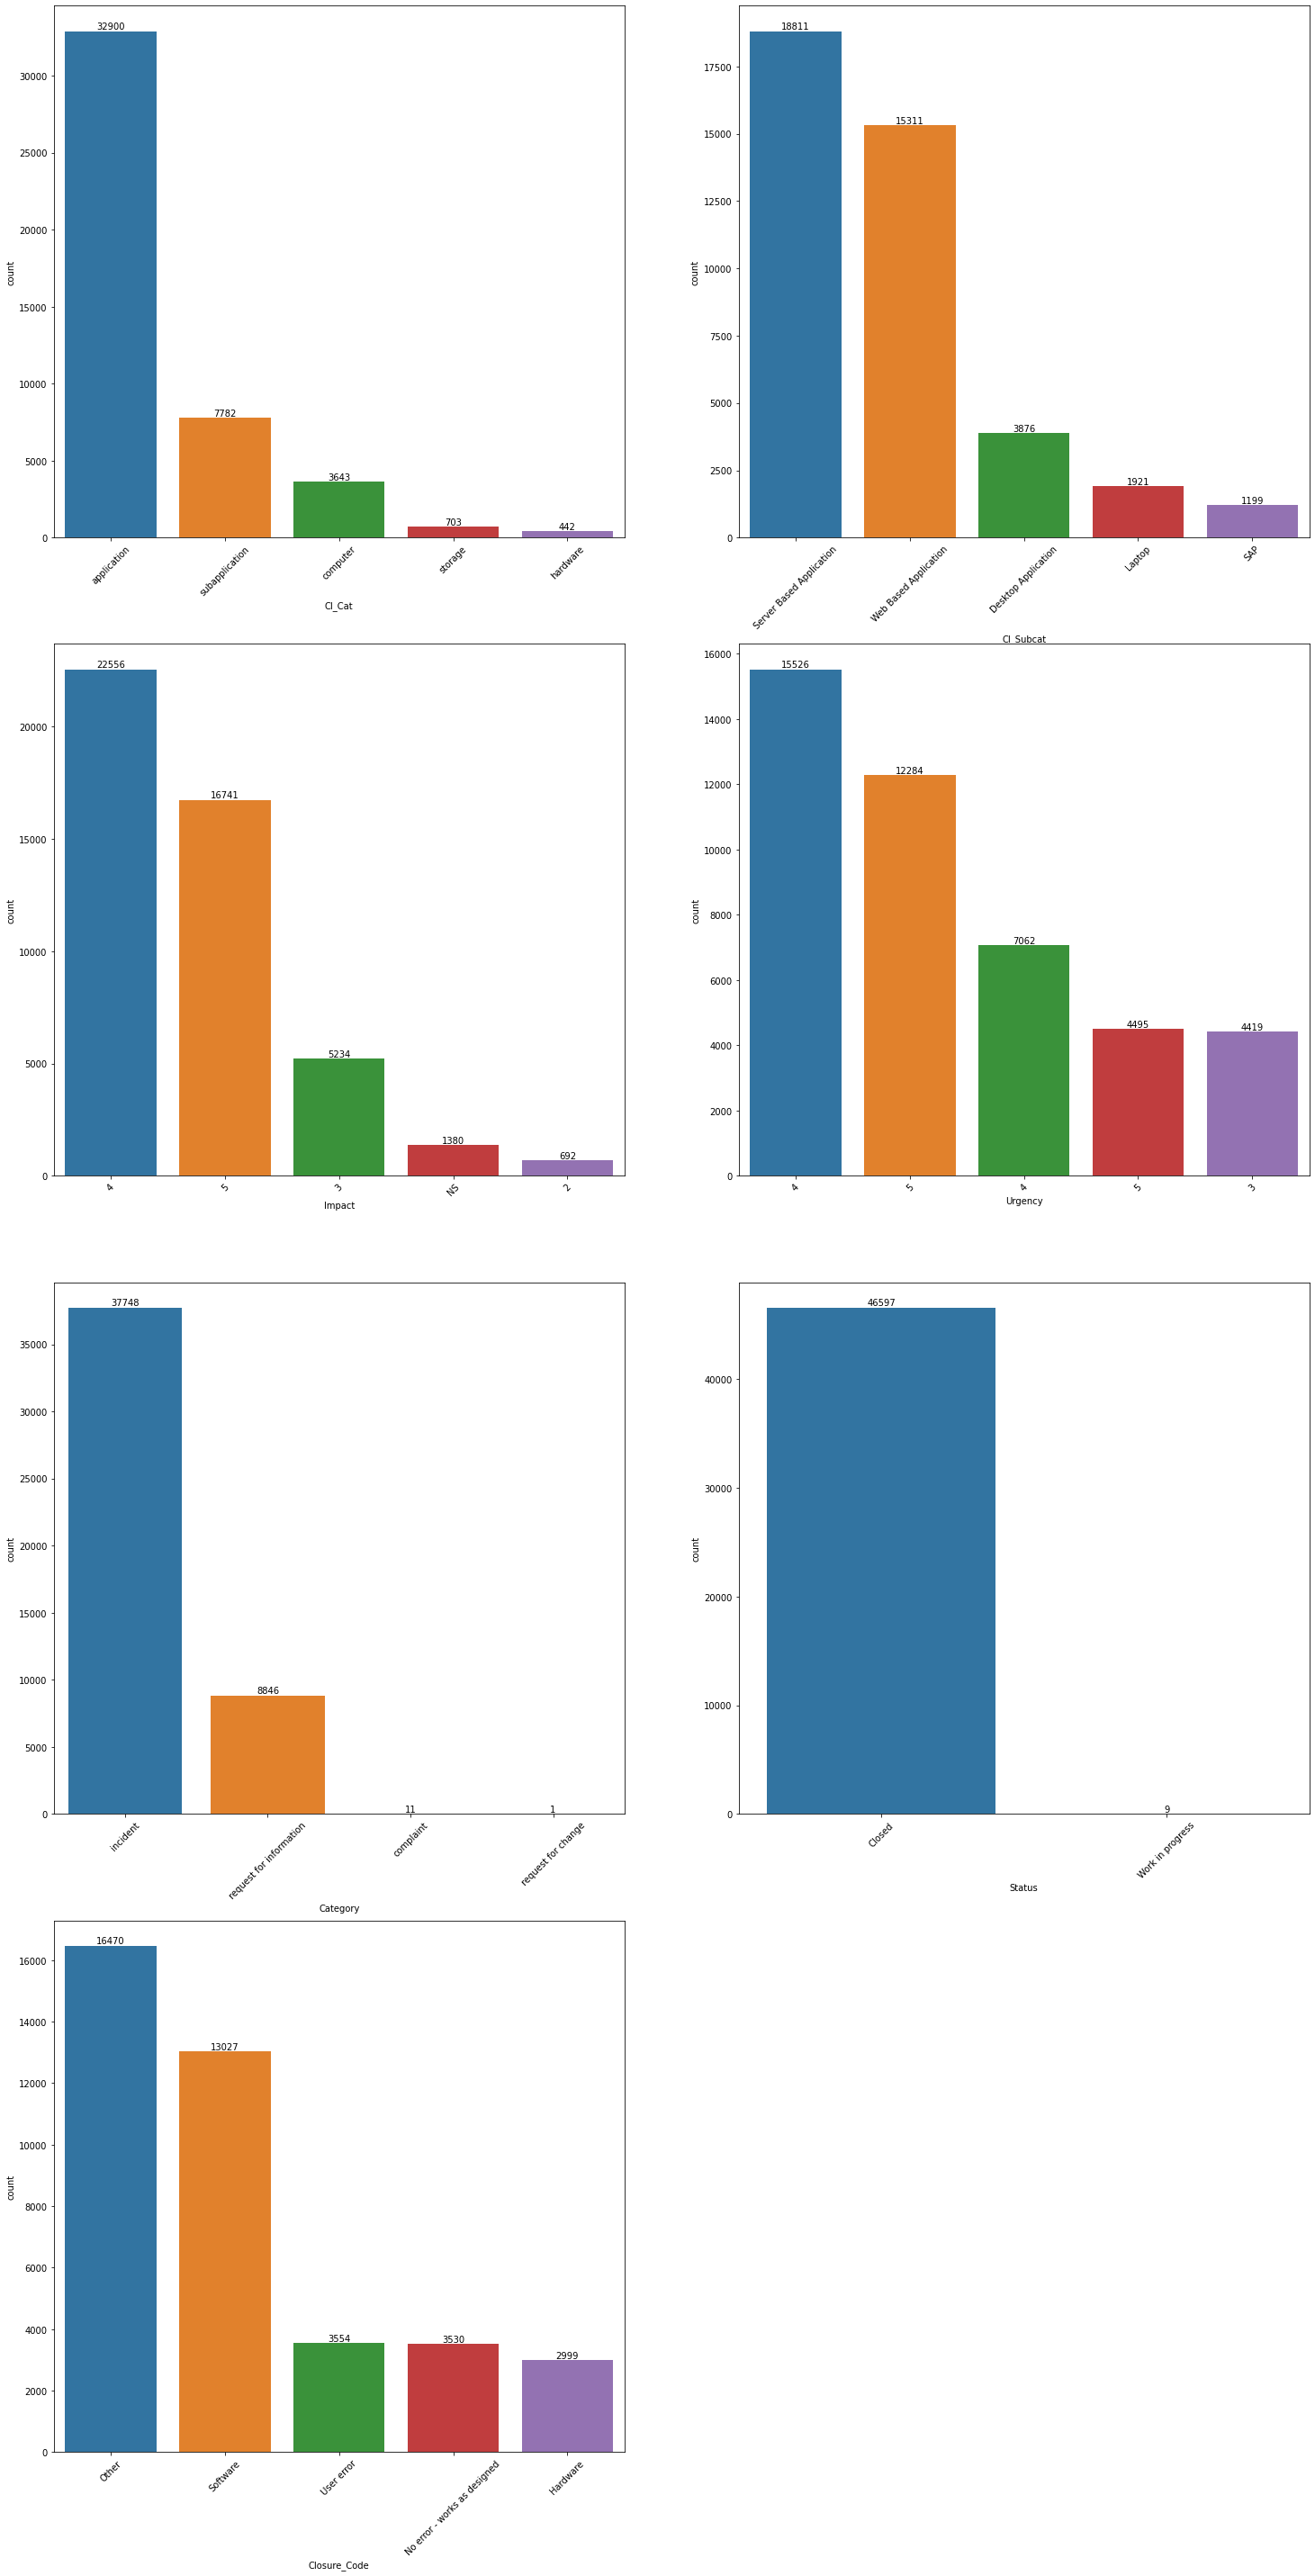

In [16]:
plt.figure(figsize=(25,50))
plotnumber=1
for i in a:
  top_categories = data[i].value_counts().head(5)
  ax = plt.subplot(4,2,plotnumber)
  sns.countplot(data=data, x=i, order=top_categories.index, ax=ax)
  labels = ax.get_xticklabels()
  ax.set_xticklabels(labels, rotation=45)
  for j, count in enumerate(top_categories):
    ax.annotate(str(count), xy=(j, count), ha='center', va='bottom')
  plotnumber+=1
plt.show()

1. In **CI_Cat** feature,majority Category is application which is of **32900** records.
2. In **CI_Subcat** feature, majority Sub Category is Server BAsed Application which is having **18811** records.
3. **Impact** feature is having maximum of 4 rating for **22556** records.
4. **Urgency** feature is having maximum of 4 rating for **15526** records.
5. There are 4 category, out of that **Incident** category are having **37748** records.
6. Around 99% observations are Closed in **Status** feature.
7. Majority of **Closure_Code** are Others and **13027** records are having Software as Closure_Code.

# **DATA PREPROCESSING**

## **Handling Missing Values**

In [17]:
data.isnull().sum()

Unnamed: 0                        0
CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

## We are removing columns having  missing values greater than 90%.

In [18]:
data.drop(['Reopen_Time','No_of_Related_Incidents','No_of_Related_Changes','Related_Change'],axis=1,inplace=True)

## Here, we are extracting the missing values in dataset.

In [19]:
def extract_missing_columns(df):
    missing_cols = df.columns[df.isna().any()]
    a= df[missing_cols]
    for i in a:
      print(a[i].value_counts())
      print()
      print('**************************************************')
    


In [20]:
extract_missing_columns(data)

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

**************************************************
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

**************************************************
4.0    22717
5.0    16486
3.0     5323
2.0      697
1.0        3
Name: Priority, dtype: int64

In [21]:
data.isnull().sum()

Unnamed: 0                       0
CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              1
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  1
Closure_Code                   460
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

## Applying MODE function for missing values

In [22]:
data['CI_Cat'].fillna(data['CI_Cat'].mode()[0], inplace=True)
data['CI_Subcat'].fillna(data['CI_Subcat'].mode()[0], inplace=True)
data['Priority'].fillna(data['Priority'].mode()[0], inplace=True)
data['No_of_Reassignments'].fillna(data['No_of_Reassignments'].mode()[0], inplace=True)
data['Resolved_Time'].fillna(data['Resolved_Time'].mode()[0], inplace=True)
data['Handle_Time_hrs'].fillna(data['Handle_Time_hrs'].mode()[0], inplace=True)
data['No_of_Related_Interactions'].fillna(data['No_of_Related_Interactions'].mode()[0], inplace=True)
data['Closure_Code'].fillna(data['Closure_Code'].mode()[0],inplace=True)

In [23]:
data.isnull().sum()

Unnamed: 0                    0
CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64

In [24]:
data['Impact'].value_counts()

4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: Impact, dtype: int64

## Replacing 'NS' string with NaN and then converting it to mode.

In [25]:
data['Impact']=data['Impact'].replace({'NS': np.nan})

In [26]:
data['Impact'].fillna(data['Impact'].mode()[0], inplace=True)

In [27]:
data['Impact'].value_counts()

4    23936
5    16741
3     5234
2      692
1        3
Name: Impact, dtype: int64

In [28]:
data.Impact = data.Impact.astype('int32')
data.Impact.unique()

array([4, 3, 5, 2, 1], dtype=int32)

In [29]:
data.Urgency.value_counts()

4               15526
5               12284
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: Urgency, dtype: int64

In [30]:
data['Urgency']=data['Urgency'].replace({'5 - Very Low': 5})

In [31]:
data.Urgency.value_counts()

4    15526
5    12285
4     7062
5     4495
3     4419
3     2117
2      538
2      158
1        5
1        1
Name: Urgency, dtype: int64

In [32]:
data.Urgency=data.Urgency.astype(np.int64)
data.Urgency.unique()

array([4, 3, 5, 2, 1])

In [33]:
data.Priority= data.Priority.astype(np.int64)
data.Priority.unique()

array([4, 3, 5, 2, 1])

<Axes: xlabel='Urgency', ylabel='count'>

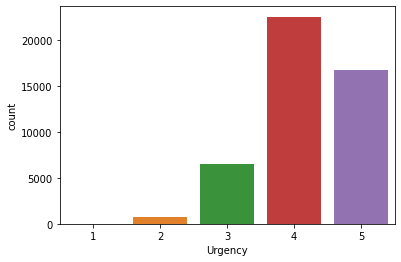

In [34]:
sns.countplot(x='Urgency',data=data)

<Axes: xlabel='Impact', ylabel='Urgency'>

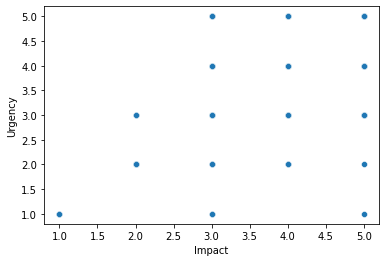

In [35]:
sns.scatterplot(x='Impact',y='Urgency',data=data)

## **Handling Outliers**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  46606 non-null  int64  
 1   CI_Name                     46606 non-null  object 
 2   CI_Cat                      46606 non-null  object 
 3   CI_Subcat                   46606 non-null  object 
 4   WBS                         46606 non-null  object 
 5   Incident_ID                 46606 non-null  object 
 6   Status                      46606 non-null  object 
 7   Impact                      46606 non-null  int32  
 8   Urgency                     46606 non-null  int64  
 9   Priority                    46606 non-null  int64  
 10  number_cnt                  46606 non-null  float64
 11  Category                    46606 non-null  object 
 12  KB_number                   46606 non-null  object 
 13  Alert_Status                466

## Finding Outliers for Numerical columns.

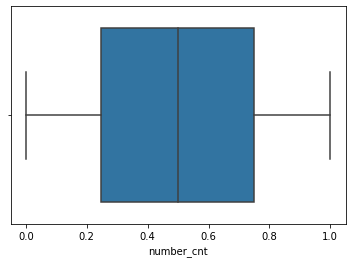

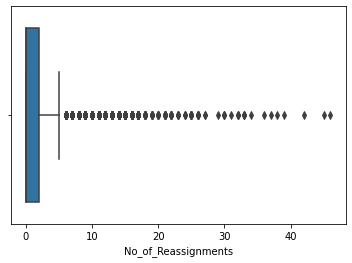

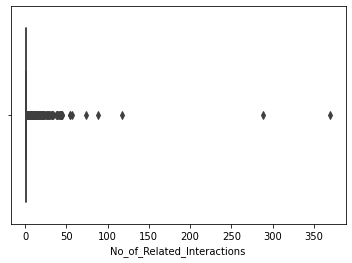

In [37]:
a= data[['number_cnt','No_of_Reassignments','No_of_Related_Interactions']]
for i in a.columns:
  sns.boxplot(x=i,data=data)
  plt.show()

## There are outliers in 'No_of_Reassignments' and 'No_of_Related_Interactions'. 

## Checking the distribution of columns having outliers.

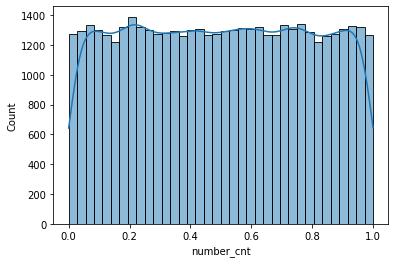

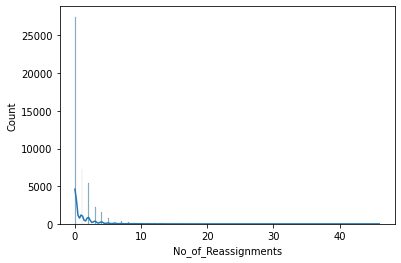

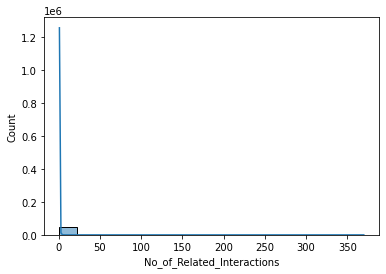

In [38]:
for i in a.columns:
  sns.histplot(x=i,data=data,kde=True)
  plt.show()

## Applying IQR method for handlilng outliers.

In [39]:
from scipy import stats
IQR= stats.iqr(data.No_of_Reassignments,interpolation='midpoint')
print('IQR is %.2f' %IQR)

Q1= data.No_of_Reassignments.quantile(0.25)
Q3= data.No_of_Reassignments.quantile(0.75)
print('Q1 is: %.2f'%Q1)
print('Q3 is ',Q3)

low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print('low_limit is %.2f'%low_limit)
print('upp_limit is %.2f'%upp_limit)

IQR is 2.00
Q1 is: 0.00
Q3 is  2.0
low_limit is -3.00
upp_limit is 5.00


In [40]:
data.loc[data['No_of_Reassignments']<low_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [41]:
data.loc[data['No_of_Reassignments']>upp_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
10,10,WBA000124,application,Web Based Application,WBS000088,IM0000019,Closed,4,4,4,0.439909,incident,KM0000611,closed,6.0,21-09-2012 12:56,08-11-2013 14:23,08-11-2013 14:23,"3,06,74,49,167",Software,1.0,SD0000040
11,11,WBA000124,application,Web Based Application,WBS000088,IM0000020,Closed,4,4,4,0.291928,incident,KM0000611,closed,8.0,01-10-2012 10:49,08-11-2013 14:18,08-11-2013 14:22,"1,32,26,19,167",Software,1.0,SD0000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,44961,SBA000060,application,Server Based Application,WBS000199,IM0045375,Closed,3,3,3,0.267787,incident,KM0000940,closed,10.0,21-03-2014 15:57,31-03-2014 17:28,31-03-2014 17:28,"5,81,92,22,222",Other,2.0,#MULTIVALUE
45040,45040,SBA000074,application,Server Based Application,WBS000152,IM0045455,Closed,5,5,5,0.680022,incident,KM0001792,closed,6.0,24-03-2014 09:57,25-03-2014 14:30,25-03-2014 14:30,"1,50,36,66,667",Software,1.0,SD0140664
45196,45196,SBA000607,application,Server Based Application,WBS000263,IM0045618,Closed,4,4,4,0.449103,incident,KM0001106,closed,7.0,24-03-2014 13:33,26-03-2014 08:43,26-03-2014 08:43,"1,61,62,77,778",Other,1.0,SD0141226
45273,45273,DTA000616,application,Desktop Application,WBS000089,IM0045696,Closed,4,4,4,0.166302,incident,KM0002337,closed,8.0,25-03-2014 08:40,31-03-2014 12:48,31-03-2014 12:48,"3,17,67,22,222",Software,1.0,SD0141549


In [42]:
data.loc[data['No_of_Reassignments']>upp_limit,'No_of_Reassignments']=np.median(data['No_of_Reassignments'])

In [43]:
data.loc[data['No_of_Reassignments']>upp_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [44]:
IQR= stats.iqr(data.No_of_Related_Interactions,interpolation='midpoint')
print('IQR is %.2f' %IQR)

Q1= data.No_of_Related_Interactions.quantile(0.25)
Q3= data.No_of_Related_Interactions.quantile(0.75)
print('Q1 is: %.2f'%Q1)
print('Q3 is ',Q3)

low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print('low_limit is %.2f'%low_limit)
print('upp_limit is %.2f'%upp_limit)

IQR is 0.00
Q1 is: 1.00
Q3 is  1.0
low_limit is 1.00
upp_limit is 1.00


In [45]:
data.loc[data['No_of_Related_Interactions']<low_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [46]:
data.loc[data['No_of_Related_Interactions']>upp_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
12,12,WBA000082,application,Web Based Application,WBS000055,IM0000021,Closed,4,4,4,0.776486,incident,KM0000401,closed,5.0,02-10-2012 12:12,04-02-2014 09:38,04-02-2014 09:38,"1,13,24,28,333",Software,2.0,#MULTIVALUE
18,18,DTA000616,application,Desktop Application,WBS000092,IM0000033,Closed,3,3,3,0.860255,incident,KM0001430,closed,0.0,07-12-2012 14:34,30-11-2013 10:39,30-11-2013 10:39,"2,62,67,33,889",Other,2.0,#MULTIVALUE
19,19,WBA000082,application,Web Based Application,WBS000055,IM0000034,Closed,5,5,5,0.663615,incident,KM0000401,closed,5.0,10-12-2012 14:44,28-03-2014 14:20,28-03-2014 14:20,"9,31,78,08,333",Other,2.0,#MULTIVALUE
27,27,SBA000662,application,Server Based Application,WBS000071,IM0000048,Closed,5,5,5,0.748361,request for information,KM0000524,closed,0.0,06-02-2013 14:07,17-10-2013 14:00,17-10-2013 14:00,"3,88,55,55,556",No error - works as designed,2.0,#MULTIVALUE
29,29,SBA000263,application,Server Based Application,WBS000072,IM0000053,Closed,5,5,5,0.853722,request for information,KM0001104,closed,2.0,18-02-2013 11:59,10-10-2013 12:53,04-12-2013 14:00,"2,77,45,55,556",Other,2.0,#MULTIVALUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46455,46455,SBA000017,application,Server Based Application,WBS000099,IM0046904,Closed,4,4,4,0.175887,incident,KM0002005,closed,1.0,31-03-2014 08:41,31-03-2014 11:56,31-03-2014 11:56,"1,55,94,44,444",Other,2.0,#MULTIVALUE
46458,46458,SBA000317,application,Server Based Application,WBS000048,IM0046907,Closed,5,5,5,0.969598,incident,KM0000310,closed,0.0,31-03-2014 08:58,31-03-2014 09:30,31-03-2014 09:30,"0,084722222",Software,2.0,#MULTIVALUE
46460,46460,SBA000317,application,Server Based Application,WBS000048,IM0046909,Closed,5,3,4,0.628989,incident,KM0000310,closed,0.0,31-03-2014 09:05,31-03-2014 09:28,31-03-2014 09:29,"0,407777778",Software,2.0,#MULTIVALUE
46471,46471,SBA000317,application,Server Based Application,WBS000048,IM0046921,Closed,5,5,5,0.280788,incident,KM0000310,closed,0.0,31-03-2014 08:17,31-03-2014 09:19,31-03-2014 09:19,"1,03",Software,2.0,#MULTIVALUE


In [47]:
data.loc[data['No_of_Related_Interactions']>upp_limit,'No_of_Related_Interactions']= np.median(data.No_of_Related_Interactions)

In [48]:
data.loc[data['No_of_Related_Interactions']>upp_limit]

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [49]:
data

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292,incident,KM0000553,closed,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415050,incident,KM0000611,closed,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927,incident,KM0000611,closed,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021
46602,46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967
46603,46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982
46604,46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986


## Feature Selection

<Axes: >

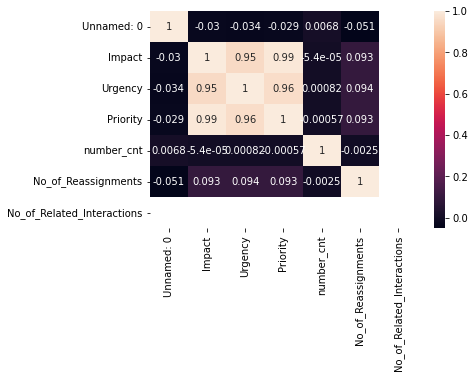

In [50]:
sns.heatmap(data=data.corr(),annot=True)

1. We have removed **Impact** feature as, it is highly correlated with Priority feature.

## **Label Encoding**

In [51]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292,incident,KM0000553,closed,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415050,incident,KM0000611,closed,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,4,3,4,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927,incident,KM0000611,closed,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


In [52]:
new_data= data[['CI_Cat','CI_Subcat','Priority','Category']]

In [53]:
#Encode the categorical values
from sklearn.preprocessing import LabelEncoder
cat_col = new_data.select_dtypes(include=object).columns
enc = LabelEncoder()
for col in (cat_col):
    new_data[col]=enc.fit_transform(new_data[col])

<ipython-input-53-e35725f511a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col]=enc.fit_transform(new_data[col])
<ipython-input-53-e35725f511a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col]=enc.fit_transform(new_data[col])
<ipython-input-53-e35725f511a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [54]:
new_data

,CI_Cat,CI_Subcat,Priority,Category
0,11,57,4,1
1,1,57,3,1
2,1,10,4,3
3,1,57,4,1
4,1,57,4,1
...,...,...,...,...
46601,1,45,4,1
46602,1,45,4,1
46603,3,21,5,1
46604,1,57,4,1


In [55]:
new_data.replace({'Priority':{2:1,3:1}},inplace=True)

<ipython-input-55-d9b1bc9b7dc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace({'Priority':{2:1,3:1}},inplace=True)


In [56]:
new_data.Priority.value_counts()

4    24097
5    16486
1     6023
Name: Priority, dtype: int64

<Axes: >

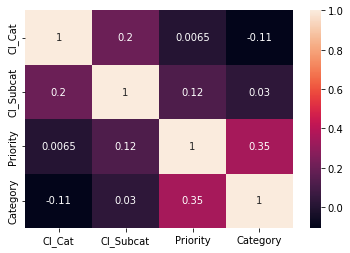

In [57]:
sns.heatmap(new_data.corr(),annot=True)

In [58]:
new_data['Priority']= new_data['Priority'].astype('int64')

<ipython-input-58-1121a11d1ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Priority']= new_data['Priority'].astype('int64')


# Model Creation

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import accuracy_score,recall_score,f1_score


In [60]:
X= new_data.drop(['Priority'],axis=1)
y= new_data['Priority']

In [61]:
X

,CI_Cat,CI_Subcat,Category
0,11,57,1
1,1,57,1
2,1,10,3
3,1,57,1
4,1,57,1
...,...,...,...
46601,1,45,1
46602,1,45,1
46603,3,21,1
46604,1,57,1


<Axes: ylabel='count'>

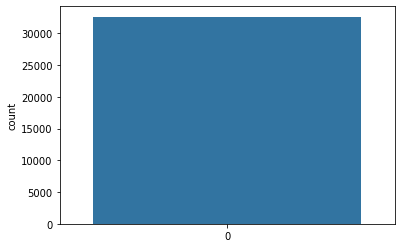

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

sns.countplot(y_train)

In [63]:
y_train.value_counts()

4    16906
5    11493
1     4225
Name: Priority, dtype: int64

In [64]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CI_Cat     46606 non-null  int64
 1   CI_Subcat  46606 non-null  int64
 2   Priority   46606 non-null  int64
 3   Category   46606 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [66]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype(float), y_train)

In [67]:
y_train_smote.value_counts()

5    16906
4    16906
1    16906
Name: Priority, dtype: int64

In [68]:
y_train_smote

0        5
1        4
2        4
3        5
4        5
        ..
50713    5
50714    5
50715    5
50716    5
50717    5
Name: Priority, Length: 50718, dtype: int64

In [69]:
from sklearn.preprocessing import label_binarize
y_train_smote=label_binarize(y_train_smote,classes=[1,4,5])
y_test = label_binarize(y_test,classes=[1,4,5])
n_classes=y_train_smote.shape[1]

y_train_smote.shape

(50718, 3)

In [70]:
X_train_smote

,CI_Cat,CI_Subcat,Category
0,1.0,57.0,1.0
1,11.0,57.0,1.0
2,1.0,57.0,1.0
3,3.0,21.0,1.0
4,1.0,45.0,3.0
...,...,...,...
50713,1.0,45.0,3.0
50714,1.0,45.0,3.0
50715,1.0,45.0,3.0
50716,3.0,21.0,1.0


In [71]:
from sklearn.preprocessing import label_binarize
y_train_smote=label_binarize(y_train_smote,classes=[1,4,5])
y_test = label_binarize(y_test,classes=[1,4,5])
n_classes=y_train_smote.shape[1]

y_train_smote.shape

(50718, 3)

In [72]:
X_train_smote.head()

,CI_Cat,CI_Subcat,Category
0,1.0,57.0,1.0
1,11.0,57.0,1.0
2,1.0,57.0,1.0
3,3.0,21.0,1.0
4,1.0,45.0,3.0


In [73]:
y_test.shape

(13982, 3)

## OneVSRest Classifier

In [74]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(LogisticRegression()).fit(X_train_smote, y_train_smote)

y_score = classifier.predict(X_test)

In [75]:
class_report = classification_report(y_test,y_score)
print(class_report)

              precision    recall  f1-score   support

           0       0.26      0.27      0.27      1798
           1       0.82      0.25      0.39      7191
           2       0.91      0.49      0.64      4993

   micro avg       0.70      0.34      0.46     13982
   macro avg       0.66      0.34      0.43     13982
weighted avg       0.78      0.34      0.46     13982
 samples avg       0.34      0.34      0.34     13982



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [106]:
def predict_threshold(model, test_data, y_test):
    '''
    Assigns various thresholds and returns confusion matrices, recall scores,
    accuracy scores, and f1 scores for each class.
    
    Args:
    model : estimator model
    test_data : Test features
    y_test : Actual labels for the test data
    '''
    classes = [1,4,5]
    print('=='*10,model,'=='*10)
    scores = []
    for i in range(len(classes)):
        print('=='*10,'class',classes[i],'=='*10)
        for thr in np.arange(0,1.1,0.1):
            y_score = np.where(model.predict_proba(test_data)[:,i] > thr, 1, 0)
            cm = confusion_matrix(y_test[:,i], y_score)
            recall = recall_score(y_test[:,i], y_score)
            accuracy = accuracy_score(y_test[:,i], y_score)
            f1 = f1_score(y_test[:,i], y_score)
            #scores.append({'class': classes[i], 'threshold': thr, 'confusion_matrix': cm,
                           #'recall_score': recall, 'accuracy_score': accuracy, 'f1_score': f1})
            print(" Threshold :",thr)
            print(cm)
            print("\n recall score :", recall)
            print(' accuracy : {:0.2f}%'.format(accuracy* 100))
            print(" f1 score : {:0.3f}".format(f1))
            print("\n","=="*50)
    return scores

In [78]:
scores = predict_threshold(classifier, X_test, y_test)
scores

==================== OneVsRestClassifier(estimator=LogisticRegression()) ====================
==================== class 1 ====================
 Threshold : 0.0
[[    0 12184]
 [    0  1798]]

 recall score : 1.0
 accuracy : 12.86%
 f1 score : 0.228

 Threshold : 0.1
[[2599 9585]
 [  35 1763]]

 recall score : 0.9805339265850945
 accuracy : 31.20%
 f1 score : 0.268

 Threshold : 0.2
[[2609 9575]
 [  50 1748]]

 recall score : 0.9721913236929922
 accuracy : 31.16%
 f1 score : 0.266

 Threshold : 0.30000000000000004
[[4691 7493]
 [ 181 1617]]

 recall score : 0.8993325917686318
 accuracy : 45.12%
 f1 score : 0.296

 Threshold : 0.4
[[9994 2190]
 [1233  565]]

 recall score : 0.314238042269188
 accuracy : 75.52%
 f1 score : 0.248

 Threshold : 0.5
[[10793  1391]
 [ 1306   492]]

 recall score : 0.27363737486095663
 accuracy : 80.71%
 f1 score : 0.267

 Threshold : 0.6000000000000001
[[11897   287]
 [ 1775    23]]

 recall score : 0.012791991101223582
 accuracy : 85.25%
 f1 score : 0.022



[]

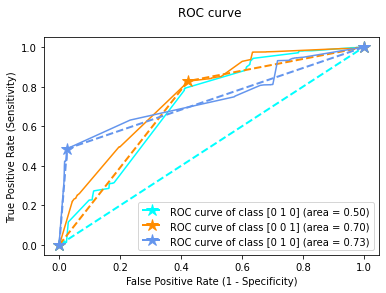

In [79]:
y_score_th=np.ndarray((3,13982))
y_score_th[0]=np.where(classifier.predict_proba(X_test)[:,0]>.7,1,0)
y_score_th[1]=np.where(classifier.predict_proba(X_test)[:,1]>0.3,1,0)
y_score_th[2]=np.where(classifier.predict_proba(X_test)[:,2]>0.5,1,0)


colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(3):
    fpr,tpr,thrs=roc_curve(y_test[:,i],classifier.predict_proba(X_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(y_test[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

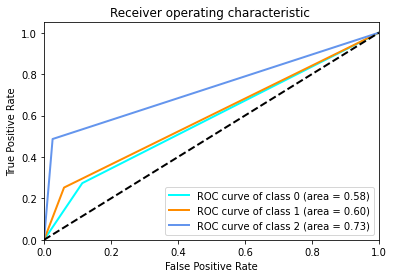

In [80]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

## **RandomForest Classifier**

In [86]:
model_RFC=(RandomForestClassifier(random_state=42))
model_RFC.fit(X_train_smote, y_train_smote)
y_RFC = model_RFC.predict(X_test)

In [87]:
print(classification_report(y_test,y_RFC))

              precision    recall  f1-score   support

           0       0.29      0.70      0.41      1798
           1       0.86      0.28      0.42      7191
           2       0.90      0.61      0.73      4993

   micro avg       0.63      0.45      0.53     13982
   macro avg       0.68      0.53      0.52     13982
weighted avg       0.80      0.45      0.53     13982
 samples avg       0.45      0.45      0.45     13982



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
acc_rf= accuracy_score(y_test,y_RFC)
acc_rf

0.45093691889572307

In [82]:
'''from sklearn.preprocessing import MultiLabelBinarizer

# Transform y_test and y_RFC using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_RFC_bin = mlb.transform(y_RFC)
y_test_bin = np.array(y_test_bin)

#y_RFC_bin = mlb.transform([[label] for label in y_RFC])
# Compute classification report
class_report = classification_report(y_test_bin, y_RFC_bin)
print(class_report)'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13982
           1       1.00      0.72      0.84     13982

   micro avg       1.00      0.86      0.92     27964
   macro avg       1.00      0.86      0.92     27964
weighted avg       1.00      0.86      0.92     27964
 samples avg       1.00      0.86      0.91     27964



In [120]:
def predict_threshold(model, test_data, y_test):
    '''
    Assigns various thresholds and returns confusion matrices, recall scores,
    accuracy scores, and f1 scores for each class.
    
    Args:
    model : estimator model
    test_data : Test features
    y_test : Actual labels for the test data
    '''
    classes = [1,4,5]
    print('=='*10,model,'=='*10)
    scores = []
    for i in range(len(classes)):
        print('=='*10,'class',classes[i],'=='*10)
        for thr in np.arange(0,1.1,0.1):
            y_score = np.where(model.predict(test_data)[:,i] > thr, 1, 0)
            cm = confusion_matrix(y_test[:,i], y_score)
            recall = recall_score(y_test[:,i], y_score)
            accuracy = accuracy_score(y_test[:,i], y_score)
            f1 = f1_score(y_test[:,i], y_score)
            #scores.append({'class': classes[i], 'threshold': thr, 'confusion_matrix': cm,
                           #'recall_score': recall, 'accuracy_score': accuracy, 'f1_score': f1})
            print(" Threshold :",thr)
            print(cm)
            print("\n recall score :", recall)
            print(' accuracy : {:0.2f}%'.format(accuracy* 100))
            print(" f1 score : {:0.3f}".format(f1))
            print("\n","=="*50)
    return scores

In [121]:
predict_threshold(model_RFC,X_test,y_test)

==================== RandomForestClassifier(random_state=42) ====================
==================== class 1 ====================
 Threshold : 0.0
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.1
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.2
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.30000000000000004
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.4
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.5
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold : 0.6000000000000001
[[9138 3046]
 [ 548 1250]]

 recall score : 0.6952169076751946
 accuracy : 74.30%
 f1 score : 0.410

 Threshold 

[]

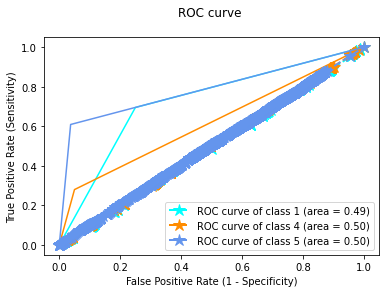

In [122]:
import numpy as np
classes=[1,4,5]
# convert y_test to a numpy array
y_test = np.array(y_test)
y_score_th = np.array(y_score_th)
# rest of the code remains the same
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(len(classes)):
    fpr,tpr,thrs=roc_curve(y_test[:,i],model_RFC.predict(X_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

In [123]:
for i in range(3):
    print('class {} \n\n{}\n'.format(classes[i],confusion_matrix(y_test[:,i],y_RFC[:,i])))

class 1 

[[9138 3046]
 [ 548 1250]]

class 4 

[[6452  339]
 [5178 2013]]

class 5 

[[8654  335]
 [1951 3042]]



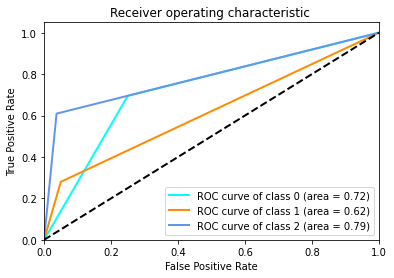

In [124]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_RFC[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

## XGB Classifier

In [128]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_smote,y_train_smote)
y_xgb = model_xgb.predict(X_test)

In [129]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41      1798
           1       0.86      0.28      0.42      7191
           2       0.90      0.61      0.73      4993

   micro avg       0.63      0.45      0.52     13982
   macro avg       0.68      0.53      0.52     13982
weighted avg       0.80      0.45      0.53     13982
 samples avg       0.45      0.45      0.45     13982



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


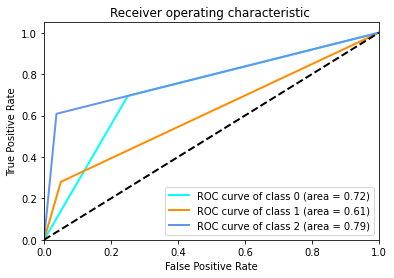

In [131]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = OneVsRestClassifier(KNeighborsClassifier())
model_knn.fit(X_train_smote,y_train_smote)
y_knn = model_knn.predict(X_test)

In [134]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.66      0.19      0.29      1798
           1       0.74      0.40      0.52      7191
           2       0.92      0.51      0.66      4993

   micro avg       0.80      0.41      0.54     13982
   macro avg       0.77      0.36      0.49     13982
weighted avg       0.79      0.41      0.54     13982
 samples avg       0.41      0.41      0.41     13982



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


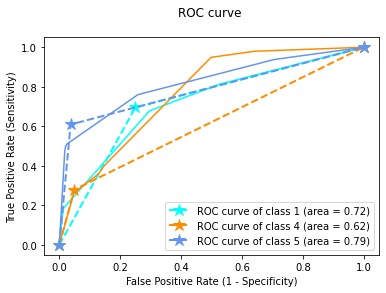

In [138]:
y_score_th=np.ndarray((3,13982))
y_score_th[0]=np.where(model_RFC.predict(X_test)[:,0]>0.7,1,0)
y_score_th[1]=np.where(model_RFC.predict(X_test)[:,1]>0.3,1,0)
y_score_th[2]=np.where(model_RFC.predict(X_test)[:,2]>0.5,1,0)


colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(3):
    fpr,tpr,thrs=roc_curve(y_test[:,i],model_knn.predict_proba(X_test)[:,i])
    plt.plot(fpr,tpr,color=colors[i])
    fpr1, tpr1, threshold = roc_curve(y_test[:,i],y_score_th[i,:])
    score = auc(fpr1,tpr1)
    plt.plot(fpr1,tpr1,color=colors[i], marker='*', linestyle='dashed',
             linewidth=2, markersize=12,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], score))

plt.title('ROC curve \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

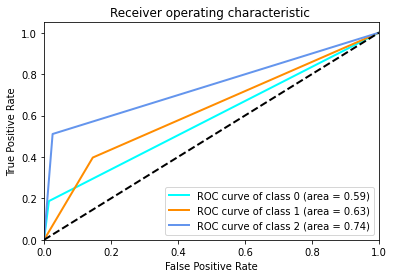

In [139]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'k--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

## Applying CV

In [141]:
from sklearn.model_selection import cross_val_score

####===================== Random Forest======================#####

RF = RandomForestClassifier(random_state=100)
RF.fit(X,y)

RFC_acc = cross_val_score(estimator=RF,X=X,y=y,cv= 8,scoring='accuracy')
rfc=[RFC_acc.mean(), RFC_acc.std()]

#####========================== XGBoost =============================####

XGB = XGBClassifier()
XGB.fit(X,y)

XGB_acc = cross_val_score(estimator= XGB,X= X,y=y,cv=8,scoring='accuracy')
xgb = [XGB_acc.mean(), XGB_acc.std()]

#####=================================KNN=============================####

KNC = KNeighborsClassifier()
KNC.fit(X,y)

KNC_acc = cross_val_score(estimator=KNC,X=X,y=y ,cv=8,scoring='accuracy')
kn=[KNC_acc.mean(), KNC_acc.std()]

####===========Summary of all the mean and standard deviations of the accuracies============######

cvs = {'model':['Random','XGB','KNN'],
      'Accuracy mean':[(rfc[0]),(xgb[0]),(kn[0])],
      'Accuracy std':[rfc[1],xgb[1],kn[1]]
      }

pd.DataFrame(cvs)

ValueError: ignored

In [144]:
RF = RandomForestClassifier(random_state=100)
RF.fit(X,y)

RFC_acc = cross_val_score(estimator=RF,X=X_train_smote,y=y_train_smote,cv= 8,scoring='accuracy')
rfc=[RFC_acc.mean(), RFC_acc.std()]

In [145]:
rfc

[0.423972284510837, 0.11524768240943344]